# UIDAI Data Hackathon 2026  
## Notebook 03: Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis on cleaned Aadhaar datasets
to uncover age-wise, region-wise, and temporal patterns in enrolment
and update behaviour.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("default")
sns.set_context("notebook")

In [2]:
BASE_PATH = "/Users/aaronrao/Desktop/projects/UIDAI_Aadhaar_Data_Insights/data/processed"

biometric_df = pd.read_csv(os.path.join(BASE_PATH, "biometric_cleaned.csv"))
demographic_df = pd.read_csv(os.path.join(BASE_PATH, "demographic_cleaned.csv"))
enrolment_df = pd.read_csv(os.path.join(BASE_PATH, "enrolment_cleaned.csv"))

print(biometric_df.shape, demographic_df.shape, enrolment_df.shape)

/var/folders/qs/5q2_h5j931g_w8krqy_fjh640000gn/T/ipykernel_53299/3422473036.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  biometric_df = pd.read_csv(os.path.join(BASE_PATH, "biometric_cleaned.csv"))
/var/folders/qs/5q2_h5j931g_w8krqy_fjh640000gn/T/ipykernel_53299/3422473036.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  demographic_df = pd.read_csv(os.path.join(BASE_PATH, "demographic_cleaned.csv"))


(1861108, 9) (2071700, 9) (1006029, 10)


/var/folders/qs/5q2_h5j931g_w8krqy_fjh640000gn/T/ipykernel_53299/3422473036.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  enrolment_df = pd.read_csv(os.path.join(BASE_PATH, "enrolment_cleaned.csv"))


### 1. Enrolment Trends Over Time
This section analyses how Aadhaar enrolment has evolved over time
across different age groups.


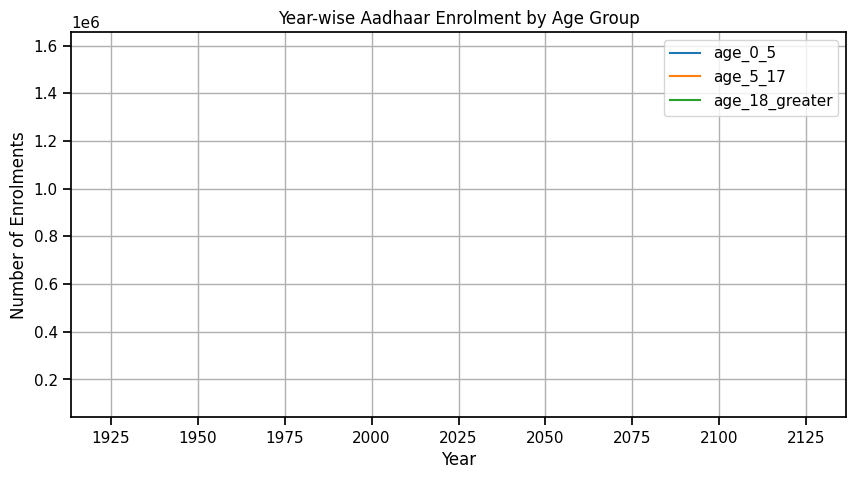

In [3]:
yearly_enrolment = enrolment_df.groupby("year")[
    ["age_0_5", "age_5_17", "age_18_greater"]
].sum()

yearly_enrolment.plot(kind="line", figsize=(10, 5))
plt.title("Year-wise Aadhaar Enrolment by Age Group")
plt.xlabel("Year")
plt.ylabel("Number of Enrolments")
plt.grid(True)
plt.show()

### 2. State-wise Enrolment Distribution
Comparative analysis of enrolment volumes across states.

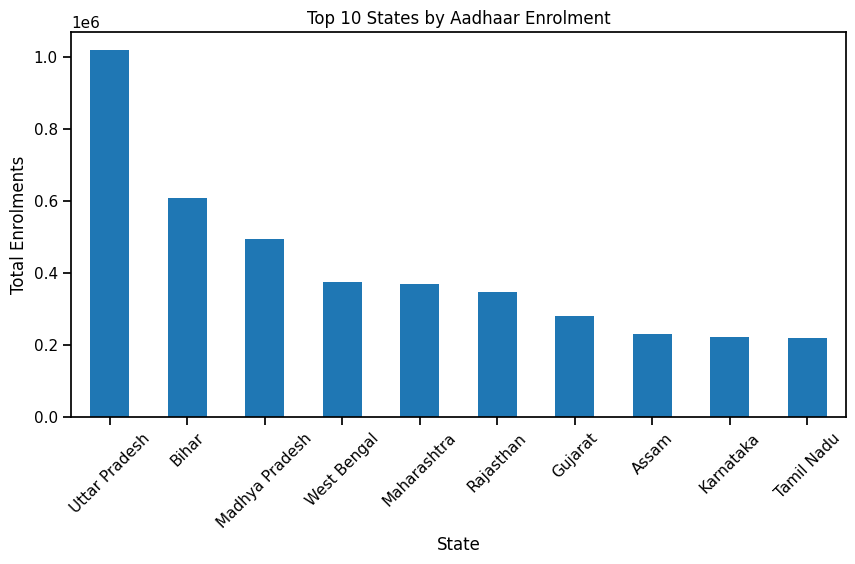

In [4]:
state_enrolment = enrolment_df.groupby("state")["total_enrolments"].sum()
top_states = state_enrolment.sort_values(ascending=False).head(10)

top_states.plot(kind="bar", figsize=(10, 5))
plt.title("Top 10 States by Aadhaar Enrolment")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.show()

### 3. Biometric Update Patterns
Analysis of biometric update frequency across age groups and regions.

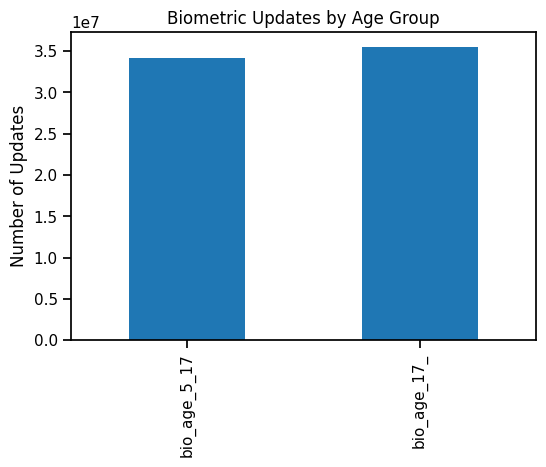

In [5]:
bio_age_totals = biometric_df[["bio_age_5_17", "bio_age_17_"]].sum()

bio_age_totals.plot(kind="bar", figsize=(6, 4))
plt.title("Biometric Updates by Age Group")
plt.ylabel("Number of Updates")
plt.show()

### 4. Demographic Updates as a Proxy for Population Mobility
Frequent demographic updates may indicate migration or lifestyle changes.

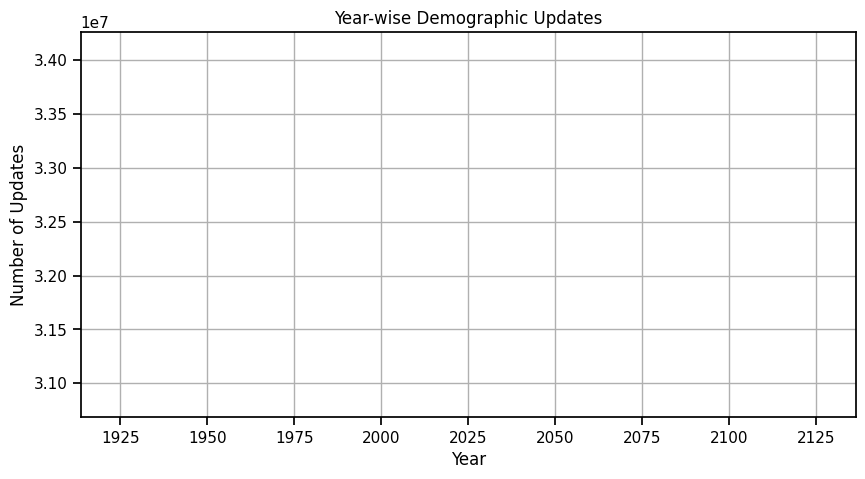

In [6]:
yearly_demo = demographic_df.groupby("year")["total_demographic_updates"].sum()

yearly_demo.plot(kind="line", figsize=(10, 5))
plt.title("Year-wise Demographic Updates")
plt.xlabel("Year")
plt.ylabel("Number of Updates")
plt.grid(True)
plt.show()

### 5. District-Level Variability
Identifying districts with unusually high enrolment or update activity.

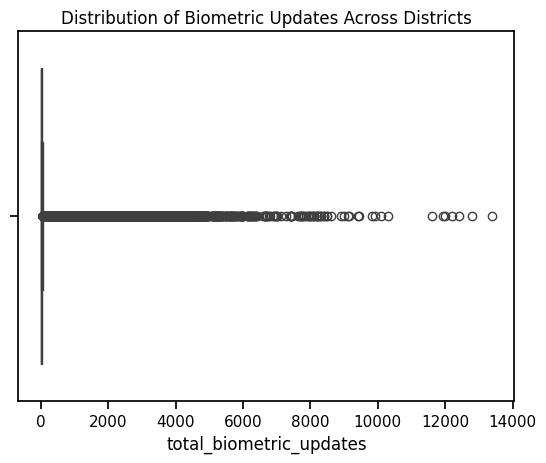

In [7]:
sns.boxplot(x=biometric_df["total_biometric_updates"])
plt.title("Distribution of Biometric Updates Across Districts")
plt.show()

### Summary of Key Observations
- Aadhaar enrolment is dominated by the adult population.
- Biometric updates are significantly higher for individuals aged 17+.
- Demographic updates show temporal variation, suggesting population mobility.
- District-level distributions indicate potential anomalies requiring deeper analysis.

Next notebook: **04_cross_dataset_analysis.ipynb**